In [2]:
import numpy as np
import pandas as pd
from pathlib import Path


def plot(df, pivot, xlabel, ylabel, ltitle, title, folder):
    plt = None
    if pivot is None:
        plt = df.plot(kind='bar', title=title,
                      x=df.columns[0], y=df.columns[1], xlabel=xlabel, ylabel=ylabel, legend=False)
    else:
        plt = df.pivot(*pivot).plot(kind='bar', title=title,
                                    xlabel=xlabel, ylabel=ylabel)
        plt.legend(loc='upper left', ncol=5, prop={'size': 8}, title=ltitle)
    plt.figure.savefig(f'{folder}/{title}.png', bbox_inches="tight", dpi=300)


def extract(files, cols):
    dfs = []
    for f in files:
        dfs.append(pd.read_csv(f, usecols=cols))
    df = pd.concat(dfs).groupby(level=0).mean()
    cols = df.columns[:-1]
    df[cols] = df[cols].applymap(np.int64)
    return df


def display_results(benchmarks, results_folder, policy):
    for b in benchmarks:
        if b == 'sw4lite':
            cols = ['omp_threads', 'solve_time(seconds)']
            pivot = ['solve_time(seconds)']
            df = extract(Path(results_folder).glob(f'{b}*.csv'), cols)
            plot(df, None, 'No. of Threads', 'Solve Time (seconds)',
                 None, f'{b}-{policy}', results_folder)
        else:
            cols = ['omp_threads', 'size', 'solve_time(seconds)']
            pivot = ['size', 'omp_threads', 'solve_time(seconds)']
            df = extract(Path(results_folder).glob(f'{b}*.csv'), cols)
            plot(df, pivot, 'Workload Size', 'Solve Time (seconds)',
                 'No. of OMP Threads', f'{b}-{policy}', results_folder)


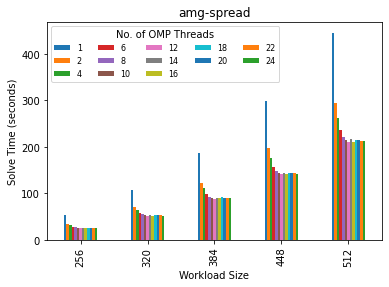

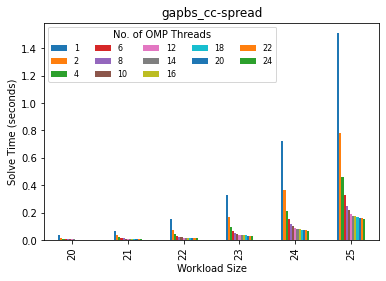

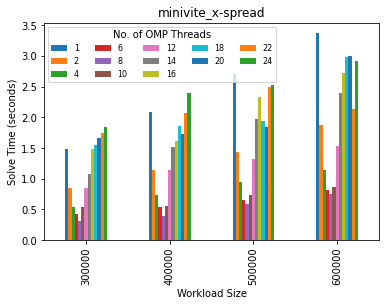

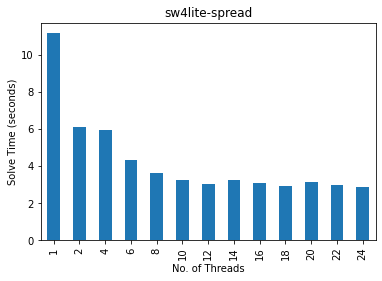

In [3]:
# PROC_BIND = spread
benchmarks = ['amg', 'gapbs_cc', 'minivite_x', 'sw4lite']
display_results(benchmarks,'results_07_25_2022-12_32_31/spread/', 'spread')

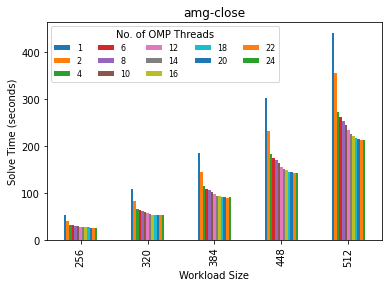

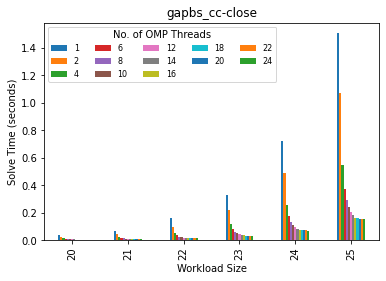

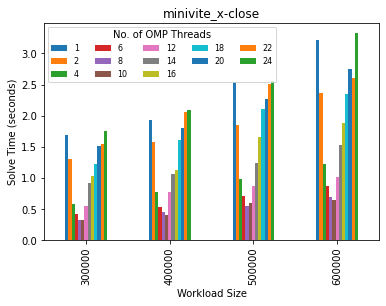

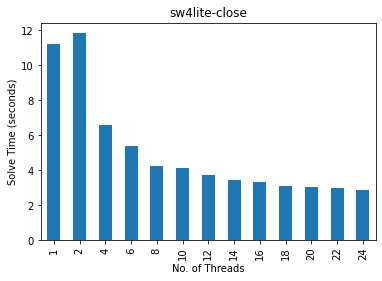

In [4]:
# PROC_BIND = close
benchmarks = ['amg', 'gapbs_cc', 'minivite_x', 'sw4lite']
display_results(benchmarks, 'results_07_25_2022-12_32_31/close/', 'close')

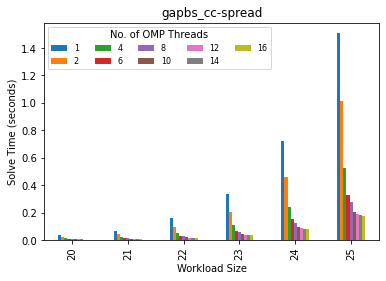

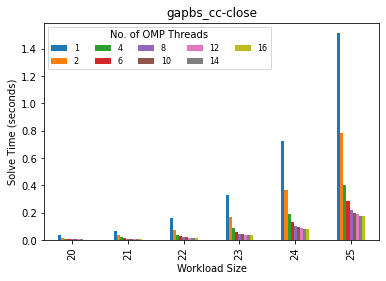

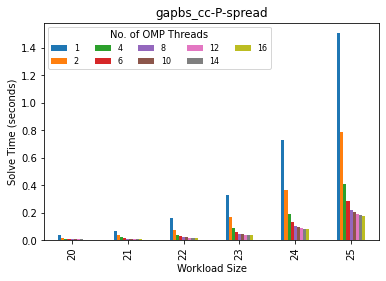

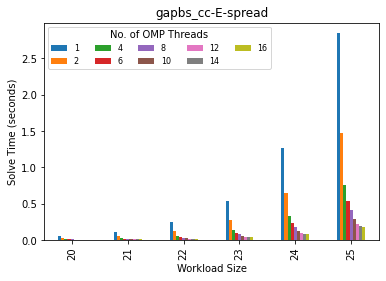

In [5]:
benchmarks = ['gapbs_cc']
policies = ['spread', 'close', 'P-spread', 'E-spread']
for policy in policies:
    display_results(benchmarks, f'results_07_27_2022-07_57_30/{policy}', policy)